<a href="https://colab.research.google.com/github/imammularif/Google-Colabs/blob/main/nama_nim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import package
import pandas as pd
import numpy as np

In [ ]:
#read data to panda dataframe
df = pd.read_csv("data-tugas-2.csv")
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
feature = df.loc[:, ["danceability","valence"]]
target = df[df.columns[14]]

In [ ]:
#Membagi data ke dalam data latih(train) dan data uji(test)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.25,random_state=255)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Menghitung akurasi
knn.score(x_test,y_test)

0.5267326732673268

In [ ]:
predict = knn.predict(x_test)

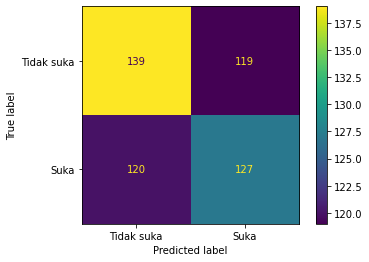

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predict)
ConfusionMatrixDisplay(cm,display_labels=['Tidak suka','Suka']).plot()

NO.2

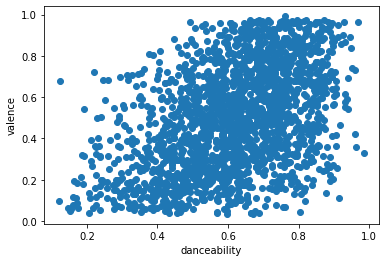

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('danceability')
plt.ylabel('valence')

plt.show()

In [ ]:
df = df.loc[:, ["danceability","valence"]]
df

,danceability,valence
0,0.833,0.286
1,0.743,0.588
2,0.838,0.173
3,0.494,0.230
4,0.678,0.904
...,...,...
2012,0.584,0.211
2013,0.894,0.867
2014,0.637,0.470
2015,0.557,0.623


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df)

# menambah kolom
df['klaster'] = kmeans_labels
df

,danceability,valence,klaster
0,0.833,0.286,1
1,0.743,0.588,1
2,0.838,0.173,1
3,0.494,0.230,2
4,0.678,0.904,0
...,...,...,...
2012,0.584,0.211,2
2013,0.894,0.867,0
2014,0.637,0.470,1
2015,0.557,0.623,1


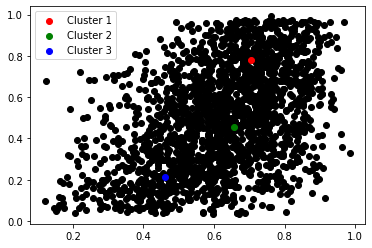

In [ ]:
#visualisasi cluster center

plt.scatter(df.iloc[:,0],df.iloc[:,1],c="black")
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],c="red",label="Cluster 1")
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],c="green",label="Cluster 2")
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],c="blue",label="Cluster 3")
plt.legend()
plt.show()

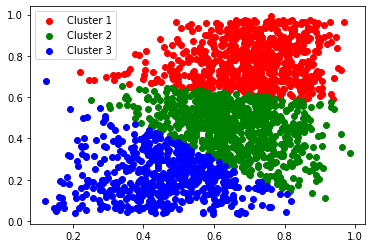

In [ ]:
# Cluster 1
dfc1 = df[df['klaster']==0]
plt.scatter(dfc1.iloc[:,0],dfc1.iloc[:,1],c="red",label="Cluster 1")
# Cluster 2
dfc2 = df[df['klaster']==1]
plt.scatter(dfc2.iloc[:,0],dfc2.iloc[:,1],c="green",label="Cluster 2")
# Cluster 3
dfc3 = df[df['klaster']==2]
plt.scatter(dfc3.iloc[:,0],dfc3.iloc[:,1],c="blue",label="Cluster 3")

plt.legend()
plt.show()

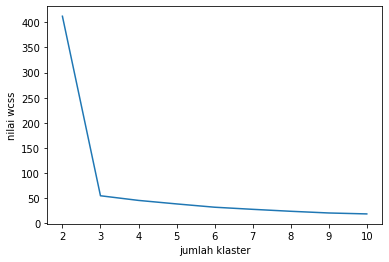

In [ ]:
# nilai wcss di kmeans itu kmeans.inertia_
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,11),wcss)
plt.xlabel('jumlah klaster')
plt.ylabel('nilai wcss')
plt.show()